In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [227]:
df = pd.read_csv("../assets/datasets/votes.csv")

In [228]:
df.head()

,Unnamed: 0,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [229]:
del df["Unnamed: 0"]
y = df["Class"]
del df["Class"]

In [230]:
for col in df.columns:
    new = [-1 if (i=="n") else 1 if (i=="y") else 0 for i in df[col]]
    df[col] = new

In [231]:
df["Class"] = y

In [232]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,republican
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,republican
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,democrat
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,democrat
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,democrat


Next, let's define the x and y variables: 

In [233]:
df.to_csv("votes_corrected.csv")

In [234]:
del df["Class"]

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [235]:
x = df.ix[:,0:16].values


In [236]:
xs = StandardScaler().fit_transform(x)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [237]:
cov_mat = np.cov(xs.T)

In [238]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

Now, let's check the eigenvalues: 

In [239]:
eig_val

array([ 7.41941927,  1.43046958,  1.13360175,  0.86493939,  0.80421642,
        0.75270164,  0.13339919,  0.21590379,  0.24093066,  0.57627688,
        0.30600181,  0.33179831,  0.5265407 ,  0.47299703,  0.39372229,
        0.43394765])

And the eigenvectors: 

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [240]:
total_eigen = sum(eig_val)
varExpl = [(i/total_eigen)*100 for i in sorted(eig_val, reverse=True)]
cum_var = np.cumsum(varExpl)

Now, calculate the explained variance and the Cumulative explained variance

In [241]:
cum_var

array([  46.26476956,   55.1846517 ,   62.25337526,   67.64681919,
         72.66161699,   77.35518756,   80.94863821,   84.23195232,
         87.18138785,   89.8873258 ,   92.34243322,   94.41140546,
         96.31952017,   97.82187513,   99.16817174,  100.        ])

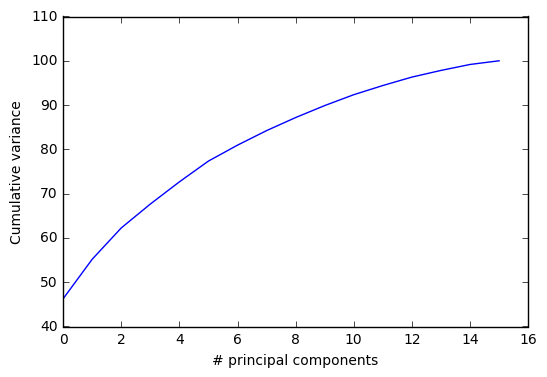

In [242]:
plt.ylabel("Cumulative variance")
plt.xlabel("# principal components")
plt.plot(cum_var)
plt.show()

Now, conduct the PCA using scikit learn

In [243]:
k = 5

In [244]:
pcask1 = PCA(n_components = k)
pca_sk = pcask1.fit_transform(xs)

In [245]:
len(pca_sk)

435

In [246]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters = 2)

In [247]:
model1.fit(pca_sk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
labels = model1.labels_

In [254]:
y_num = [0 if i == "republican" else 1 for i in y]

In [255]:
y_act = np.array(y_num)

In [256]:
y_act.dot(labels)/np.sqrt((y_act.dot(y_act))*(labels.dot(labels)))

0.89824116927644893

In [257]:
from sklearn.metrics import confusion_matrix

In [258]:
confusion_matrix(y_num, labels)

array([[158,  10],
       [ 42, 225]])

n = 5, array([[225,  42],
       [ 10, 158]]), cor = 0.86

n= 10, array([[225,  42],
       [ 10, 158]]), cor = 0.86

n = 17, array([[225,  42],
       [ 10, 158]]) cor = 0.866

In [259]:
pca_sk

array([[ 3.49638139,  0.08617499, -1.37262069, -0.54606522, -0.50874647],
       [ 3.73464316,  0.61772426,  0.95019213, -0.28260878, -0.67194348],
       [ 2.0581138 ,  2.82717954,  0.13865711,  0.44397967,  1.07274371],
       ..., 
       [ 3.34355972,  0.74714846, -0.42868994,  0.53514793, -1.38084876],
       [ 2.50672257, -1.74608814, -0.0407045 , -0.13138701, -0.87362757],
       [ 3.68853581,  0.1699092 ,  0.28985992,  0.41312852,  1.20048722]])

In [260]:
pca1 = [i[0] for i in pca_sk]
pca2 = [i[2] for i in pca_sk]

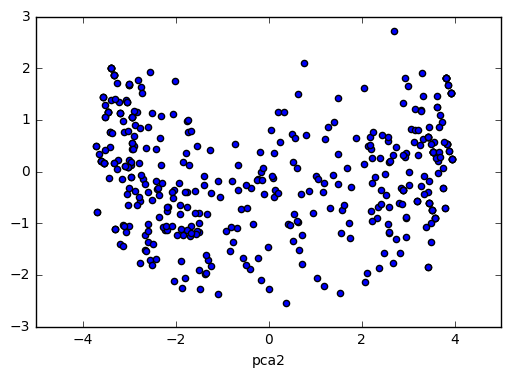

In [261]:
plt.xlabel("pca1")
plt.xlabel("pca2")
plt.scatter(pca1, pca2)
plt.show()

In [262]:
df["party"] = y_num
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,party
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,0
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,0
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,1


In [178]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,party
V1,1.000000,0.023232,0.397680,-0.421307,-0.369100,-0.402215,0.362022,0.399039,0.339840,-0.086469,0.105277,-0.411120,-0.348360,-0.370628,0.201782,0.116570,-0.405217
V2,0.023232,1.000000,-0.054237,0.076274,0.133882,0.149569,-0.203465,-0.103966,-0.190123,-0.122931,0.188786,-0.019364,0.223338,-0.016535,-0.110940,-0.091440,0.004212
V3,0.397680,-0.054237,1.000000,-0.725232,-0.651244,-0.431960,0.579655,0.698150,0.603294,0.022112,0.218328,-0.645382,-0.526661,-0.585085,0.478330,0.311423,-0.738946
V4,-0.421307,0.076274,-0.725232,1.000000,0.753347,0.476290,-0.580509,-0.694025,-0.639042,0.044360,-0.282151,0.690901,0.593952,0.647853,-0.538417,-0.270164,0.911456
V5,-0.369100,0.133882,-0.651244,0.753347,1.000000,0.624175,-0.694744,-0.827431,-0.782799,0.009348,-0.146776,0.634723,0.645797,0.695011,-0.558103,-0.274914,0.708580
V6,-0.402215,0.149569,-0.431960,0.476290,0.624175,1.000000,-0.544016,-0.553281,-0.573118,0.090209,0.014060,0.506593,0.546624,0.579975,-0.450018,-0.196053,0.426636
V7,0.362022,-0.203465,0.579655,-0.580509,-0.694744,-0.544016,1.000000,0.722267,0.657857,0.034410,0.042498,-0.536499,-0.570938,-0.519201,0.484321,0.351131,-0.513384
V8,0.399039,-0.103966,0.698150,-0.694025,-0.827431,-0.553281,0.722267,1.000000,0.742742,0.029609,0.137919,-0.615388,-0.607425,-0.624809,0.537815,0.318951,-0.649861
V9,0.339840,-0.190123,0.603294,-0.639042,-0.782799,-0.573118,0.657857,0.742742,1.000000,0.030900,0.043339,-0.586307,-0.527483,-0.556156,0.480704,0.292134,-0.617281
V10,-0.086469,-0.122931,0.022112,0.044360,0.009348,0.090209,0.034410,0.029609,0.030900,1.000000,-0.034410,0.040293,0.047579,0.116116,-0.056767,0.120774,0.083091


In [179]:
del df["party"]

## Decision tree with top 5 features (from R values)

In [263]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [264]:
X = df[["V3", "V4", "V5", "V8", "V12"]]
y = y_num

In [265]:
from sklearn.cross_validation import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

In [267]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [268]:
y_pred = dtc.predict(X_test)

In [269]:
from sklearn.metrics import accuracy_score

In [270]:
accuracy_score(y_test, y_pred)

0.95419847328244278

## Decision tree with top 5 features from PCA

In [271]:
dtc1 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(pca_sk,y_num,test_size=0.3,stratify = y_num)
dtc1.fit(X_train,y_train)

predictions = dtc1.predict(X_test)

In [272]:
accuracy_score(y_test, predictions)

0.92366412213740456

## Logistic regression with top 5 PCA features

In [ ]:
model = LogisticRegression()

model.fit(x, y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

C = [10, 1, .1, .001]

for c in C:
   clf = LogisticRegression(penalty='l2', C=c)
   clf.fit(X_train, y_train)
   print('C:', c)
   print('Coefficient of each feature:', clf.coef_)
   print('Training accuracy:', clf.score(X_train, y_train))
   print('Test accuracy:', clf.score(X_test, y_test))
   print("")
   
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['republicans','democrat'])
print(Y_pp.iloc[0:20])